## 1.Environment Setup

In [18]:
import os
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

# Set seed to ensure consistent results between runs
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)
random.seed(SEED)
print(f"Seed: {SEED}")


Seed: 42


## 2.Data Processing

In [19]:
# https://drive.google.com/file/d/1T6AWCoyeC2MqGvmqZPPcA4ni5Md1k0sI/view?usp=sharing
!gdown 1T6AWCoyeC2MqGvmqZPPcA4ni5Md1k0sI


Downloading...
From: https://drive.google.com/uc?id=1T6AWCoyeC2MqGvmqZPPcA4ni5Md1k0sI
To: /home/banhmuy/data-science-artificial-intelligence-projects/Heart-Disease-Diagnosis/notebooks/dataset.zip
100%|██████████████████████████████████████| 21.1k/21.1k [00:00<00:00, 1.08MB/s]


In [20]:
!unzip -o dataset.zip


Archive:  dataset.zip
  inflating: splits/fe_train.csv     
  inflating: splits/raw_test.csv     
  inflating: splits/raw_val.csv      
  inflating: splits/fe_test.csv      
  inflating: splits/fe_val.csv       
  inflating: splits/fe_feature_names.json  
  inflating: splits/raw_train.csv    


In [21]:
def read_csv(file_path):
    df = pd.read_csv(file_path)
    display(df.head())

    X = df.drop('target', axis=1)
    y = df['target']
    display(y.value_counts())

    print("Shape df: ", df.shape)
    print("Shape X: ", X.shape)
    print("Shape y: ", y.shape)

    return X, y


### 2.1 Original Dataset

In [22]:
X_train, y_train = read_csv('splits/raw_train.csv')


,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,-0.729485,-0.395692,0.458139,0.708371,-0.445445,1.0,1.000000,0.0,1.0,0.0,0.5,0.000000,1.0,1
1,0.050166,-0.054513,0.230598,0.222495,-0.891627,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,-0.061212,0.059213,0.723605,0.399178,-0.891627,0.0,0.333333,1.0,1.0,1.0,0.0,0.333333,0.0,0
3,-0.061212,-1.305501,1.121803,0.266666,-0.891627,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,1.0,0
4,0.272924,0.514117,-0.167601,-1.190962,-0.713154,0.0,1.000000,0.0,0.0,1.0,0.5,0.000000,1.0,1


target
0    131
1    111
Name: count, dtype: int64

Shape df:  (242, 14)
Shape X:  (242, 13)
Shape y:  (242,)


In [23]:
X_val, y_val = read_csv('splits/raw_val.csv')


,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,-1.063621,0.400391,-0.262410,0.089984,-0.713154,0.0,1.000000,0.0,1.0,1.0,0.5,0.0,0.0,0
1,1.720848,-0.054513,1.368307,-1.809349,1.250048,1.0,1.000000,0.0,1.0,0.0,0.5,1.0,0.0,1
2,-0.061212,1.082748,-0.338257,0.664201,0.536156,1.0,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,0
3,0.941197,0.229802,0.040979,0.973394,-0.891627,0.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0
4,0.495681,0.229802,-0.300333,0.487519,-0.445445,1.0,1.000000,0.0,0.0,0.0,0.5,0.0,1.0,0


target
0    16
1    14
Name: count, dtype: int64

Shape df:  (30, 14)
Shape X:  (30, 13)
Shape y:  (30,)


In [24]:
X_test, y_test = read_csv('splits/raw_test.csv')


,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,0.384303,-0.168240,-0.641646,-0.837597,1.071575,1.0,1.000000,0.0,1.0,1.0,0.5,1.0,1.0,1
1,-2.288787,-0.736870,-1.286348,1.061736,-0.891627,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0
2,0.829818,-0.054513,-0.357219,-0.175039,0.714629,1.0,0.666667,0.0,0.0,0.0,0.5,1.0,1.0,0
3,-0.395349,-0.054513,0.116827,-0.042528,-0.445445,0.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0
4,-1.397757,-0.623144,-0.186562,1.945146,-0.177735,1.0,0.666667,1.0,0.0,0.0,1.0,0.0,1.0,0


target
0    17
1    14
Name: count, dtype: int64

Shape df:  (31, 14)
Shape X:  (31, 13)
Shape y:  (31,)


### 2.2 Feature Engineering Dataset

In [25]:
X_train_fe, y_train_fe = read_csv('splits/fe_train.csv')


,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_1.0,target
0,0.0,1.0,1.0,1.0,0.0,1.0,-0.445445,0.0,0.458139,1.0,0.708371,0.726265,1.0,1
1,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,0.230598,0.0,0.222495,-0.054469,1.0,0
2,1.0,0.0,0.0,0.0,1.0,0.0,-0.891627,1.0,0.723605,0.0,0.399178,0.099522,0.0,0
3,0.0,1.0,0.0,1.0,0.0,1.0,-0.891627,1.0,1.121803,0.0,0.266666,0.031766,1.0,0
4,0.0,1.0,1.0,1.0,1.0,0.0,-0.713154,0.0,-0.167601,1.0,-1.190962,-0.859761,0.0,1


target
0    131
1    111
Name: count, dtype: int64

Shape df:  (242, 14)
Shape X:  (242, 13)
Shape y:  (242,)


In [26]:
X_val_fe, y_val_fe = read_csv('splits/fe_val.csv')


,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_1.0,target
0,1.0,0.0,1.0,1.0,1.0,0.0,-0.713154,0.0,-0.262410,1.0,0.089984,0.628019,0.0,0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.250048,0.0,1.368307,1.0,-1.809349,-1.592443,1.0,1
2,0.0,1.0,0.0,1.0,0.0,1.0,0.536156,1.0,-0.338257,0.0,0.664201,0.235034,1.0,0
3,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,0.040979,0.0,0.973394,-0.161823,0.0,0
4,0.0,1.0,1.0,1.0,0.0,1.0,-0.445445,0.0,-0.300333,1.0,0.487519,-0.163464,1.0,0


target
0    16
1    14
Name: count, dtype: int64

Shape df:  (30, 14)
Shape X:  (30, 13)
Shape y:  (30,)


In [27]:
X_test_fe, y_test_fe = read_csv('splits/fe_test.csv')


,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_1.0,target
0,0.0,1.0,1.0,0.0,1.0,0.0,1.071575,0.0,-0.641646,1.0,-0.837597,-0.736915,1.0,1
1,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,-1.286348,0.0,1.061736,2.749978,1.0,0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.714629,0.0,-0.357219,1.0,-0.175039,-0.619566,1.0,0
3,1.0,0.0,0.0,1.0,0.0,1.0,-0.445445,1.0,0.116827,0.0,-0.042528,0.071622,0.0,0
4,0.0,1.0,0.0,1.0,0.0,1.0,-0.177735,0.0,-0.186562,0.0,1.945146,2.141882,1.0,0


target
0    17
1    14
Name: count, dtype: int64

Shape df:  (31, 14)
Shape X:  (31, 13)
Shape y:  (31,)


## 3.Ensemble Model (Stacking - Meta-Learner: KNN)

In [28]:
def init_model():
    # Khởi tạo mô hình Stacking Ensemble
    ensemble_model = StackingClassifier(
        estimators=[
            ('knn', KNeighborsClassifier()),
            ('dt', DecisionTreeClassifier(random_state=SEED)),
            ('nb', GaussianNB()),
        ],
        final_estimator=KNeighborsClassifier(),
        stack_method='predict_proba',
        passthrough=False
    )
    display(ensemble_model)
    return ensemble_model


def evaluate_ensemble(ensemble_model, X_train, y_train, X_val, y_val):
    ensemble_model.fit(X_train, y_train)
    ensemble_pred = ensemble_model.predict(X_val)
    ensemble_accuracy = accuracy_score(y_val, ensemble_pred)

    print(f"Độ chính xác Ensemble Model: {ensemble_accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_val, ensemble_pred))
    return ensemble_accuracy


def evaluate_ensemble_test(ensemble_model, X_test, y_test):
    ensemble_test_pred = ensemble_model.predict(X_test)
    ensemble_test_accuracy = accuracy_score(y_test, ensemble_test_pred)
    print(f"Độ chính xác Ensemble trên tập test: {ensemble_test_accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, ensemble_test_pred))
    return ensemble_test_accuracy


### 3.1 Ensemble on Original Dataset

In [29]:
ensemble_model = init_model()


,estimators,"[('knn', ...), ('dt', ...), ...]"
,final_estimator,KNeighborsClassifier()
,cv,None
,stack_method,'predict_proba'
,n_jobs,None
,passthrough,False
,verbose,0
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [30]:
accuracy = evaluate_ensemble(
    ensemble_model,
    X_train, y_train,
    X_val, y_val
)
test_accuracy = evaluate_ensemble_test(
    ensemble_model, X_test, y_test
)

Độ chính xác Ensemble Model: 0.8667

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.86      0.86      0.86        14

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

Độ chính xác Ensemble trên tập test: 0.8387

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.76      0.93      0.84        14

    accuracy                           0.84        31
   macro avg       0.85      0.85      0.84        31
weighted avg       0.85      0.84      0.84        31



In [31]:
test_accuracy = evaluate_ensemble_test(
    ensemble_model, X_test, y_test
)

Độ chính xác Ensemble trên tập test: 0.8387

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.76      0.93      0.84        14

    accuracy                           0.84        31
   macro avg       0.85      0.85      0.84        31
weighted avg       0.85      0.84      0.84        31



### 3.2 Ensemble on Feature Engineering Dataset

In [32]:
ensemble_model_fe = init_model()


,estimators,"[('knn', ...), ('dt', ...), ...]"
,final_estimator,KNeighborsClassifier()
,cv,None
,stack_method,'predict_proba'
,n_jobs,None
,passthrough,False
,verbose,0
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [33]:
accuracy_fe = evaluate_ensemble(
    ensemble_model_fe,
    X_train_fe, y_train_fe,
    X_val_fe, y_val_fe
)
test_accuracy_fe = evaluate_ensemble_test(
    ensemble_model_fe,
    X_test_fe,
    y_test_fe
)

Độ chính xác Ensemble Model: 0.9333

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.88      1.00      0.93        14

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30

Độ chính xác Ensemble trên tập test: 0.9032

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.82      1.00      0.90        14

    accuracy                           0.90        31
   macro avg       0.91      0.91      0.90        31
weighted avg       0.92      0.90      0.90        31



## 4.Result Visualization

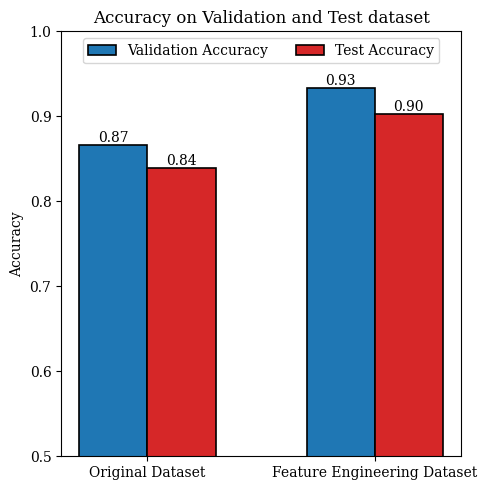

In [34]:
plt.rcParams['font.family'] = 'DejaVu Serif'

labels = ['Original Dataset', 'Feature Engineering Dataset']
val_accs  = [accuracy, accuracy_fe]
test_accs = [test_accuracy, test_accuracy_fe]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(5, 5))

rects1 = ax.bar(x - width/2, val_accs,  width,
                label='Validation Accuracy',
                color='tab:blue', edgecolor='black', linewidth=1.2)
rects2 = ax.bar(x + width/2, test_accs, width,
                label='Test Accuracy',
                color='tab:red', edgecolor='black', linewidth=1.2)

ax.set_ylim(0.5, 1.0)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy on Validation and Test dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=2, loc="upper center")

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate(f'{h:.2f}', xy=(rect.get_x()+rect.get_width()/2, h),
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.savefig("Ensemble_accuracy_comparison.png", dpi=300, bbox_inches="tight")
fig.savefig("Ensemble_accuracy_comparison.pdf", bbox_inches="tight")
plt.show()
